In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [2]:
glass = pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Text(0, 0.5, 'Count')

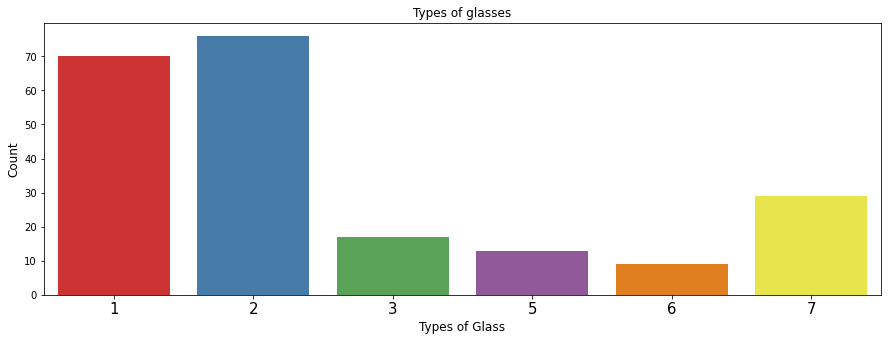

In [6]:
plt.figure(figsize=(15, 5))
    
plt.title("Types of glasses")
sns.countplot(data=glass, x="Type",palette = "Set1")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Glass", fontsize=12)
plt.ylabel("Count", fontsize=12)

<AxesSubplot:>

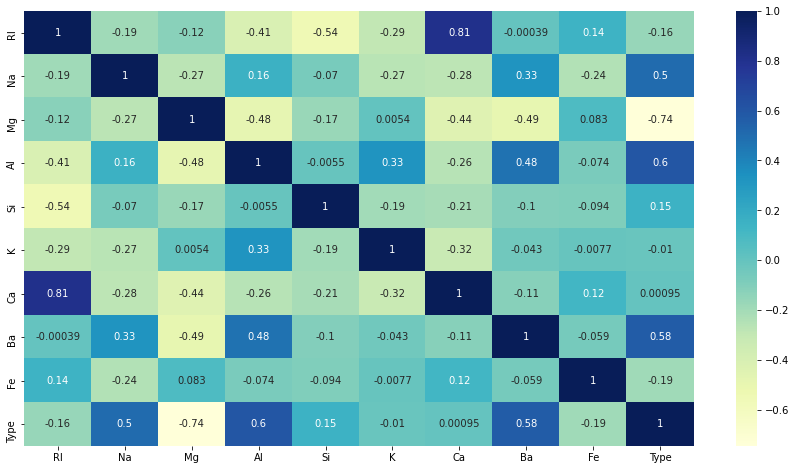

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(glass.corr(),annot=True, cmap="YlGnBu" )

Text(0.5, 1.0, 'Correlation with glass type \n')

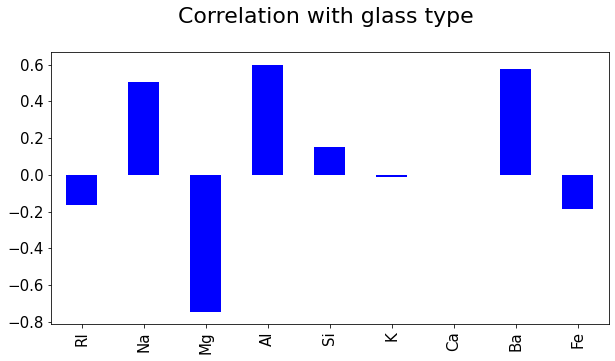

In [8]:
data2 = glass.iloc[:,:-1]

correlations = data2.corrwith(glass.Type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5), 
        fontsize = 15, 
        color = 'blue')
plt.title('Correlation with glass type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22")

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


scaled_features=scaler.fit_transform(glass.drop('Type',axis=1))
data_head=pd.DataFrame(scaled_features,columns=glass.columns[:-1])
data_head.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_head,
                                                    glass['Type'], 
                                                    test_size=0.3, 
                                                    random_state=42)

In [11]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of y_train:  (149,)
Shape of y_test:  (65,)


In [12]:
import numpy
from sklearn.model_selection import GridSearchCV

In [13]:
array = glass.values
X = array[:, 0:9]
Y = array[:, 9]

In [14]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [15]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [16]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [17]:
pred = model.predict(X_test)
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  0.676923076923077


In [18]:
kfold = KFold(n_splits=10)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.7042857142857143


Classification Report                precision    recall  f1-score   support

           1       0.59      0.89      0.71        19
           2       0.62      0.57      0.59        23
           3       0.00      0.00      0.00         4
           5       1.00      0.33      0.50         6
           6       0.75      1.00      0.86         3
           7       1.00      0.90      0.95        10

    accuracy                           0.68        65
   macro avg       0.66      0.62      0.60        65
weighted avg       0.67      0.68      0.65        65



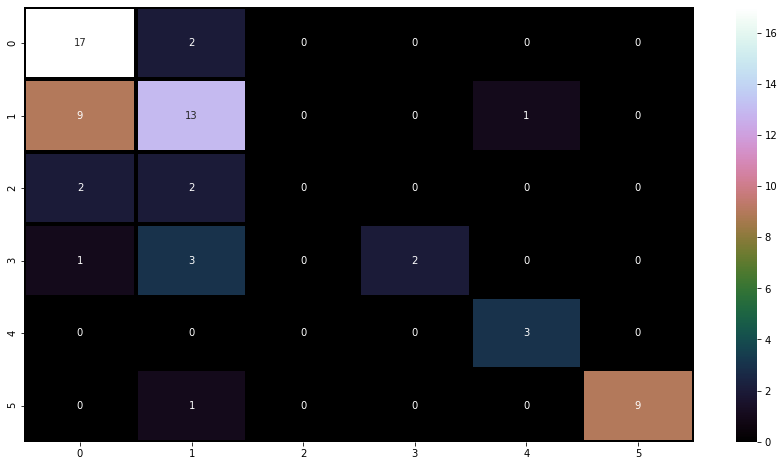

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "",linecolor="k",linewidths=3, cmap="cubehelix")
print('Classification Report ',classification_report(y_test,pred))

In [20]:
err_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict=knn.predict(X_test)
    err_rate.append(np.mean(predict!=y_test))

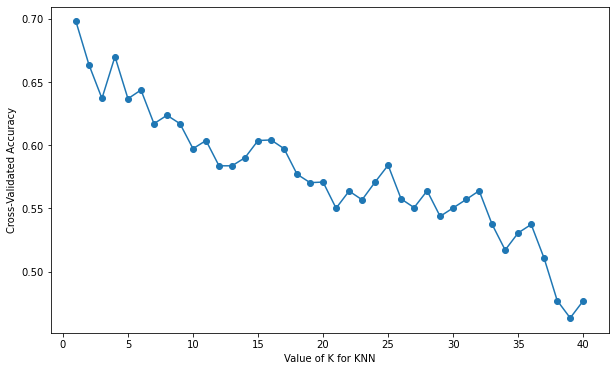

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [22]:
knn_model=KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train,y_train)
pred_knn=knn_model.predict(X_test)

acc_knn= accuracy_score(y_test,pred_knn)
print("The accuracy is  {}".format(acc_knn))

The accuracy is  0.676923076923077


In [23]:
kfold_knn = KFold(n_splits=10)
results_knn = cross_val_score(knn_model, X_train, y_train, cv=kfold_knn)
print(results_knn.mean())

0.7042857142857143


In [24]:
kf = KFold(n_splits=15)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10,cv=kf, n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


In [25]:
gs_results.best_score_

0.711851851851852

In [26]:
model_final = gs_results.best_estimator_
model_final

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [27]:
gs_results.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['eclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             verbose=10)>

In [28]:
pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)*100
print("The accuracy is  {}".format(acc_final))

The accuracy is  75.38461538461539


Classification Report                precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.75      0.65      0.70        23
           3       0.40      0.50      0.44         4
           5       1.00      0.50      0.67         6
           6       0.75      1.00      0.86         3
           7       1.00      1.00      1.00        10

    accuracy                           0.75        65
   macro avg       0.77      0.75      0.74        65
weighted avg       0.77      0.75      0.75        65



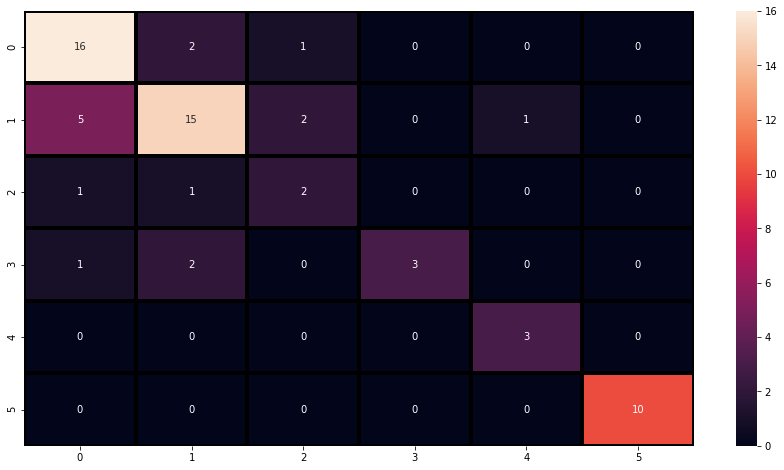

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, pred_final),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))